In [1]:
import numpy as np
import matplotlib.pyplot as plt

Probemos una suma de trigonométricas con ruido

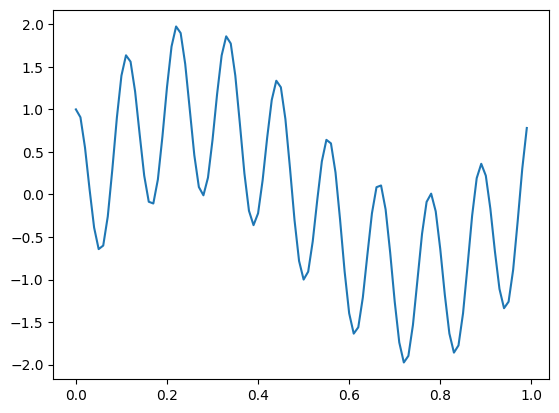

In [2]:
sr=100
ts=1/sr
t=np.arange(0,1,ts)
x=np.sin(2*np.pi*t)+np.cos(18*np.pi*t)
plt.plot(t, x)


Escribamos la transformada de Fourier discreta a mano, pero agregando el factor ik para que calcule la derivada.

In [3]:
def DFTD(x):
  N=len(x)
  X=[]
  for k in range(N):
    X_k=0
    for n in range(N):
      e=np.exp((2j*np.pi*k*n)/N)
      X_k+=x[n]/e
    X.append(1J*k*X_k)
  return np.array(X)


Escribamos el algoritmo de la transformada inversa

In [4]:
def IDFT(X):
  N=len(X)
  x=[]
  for n in range(N):
    x_n=0
    for k in range(N):
      e=np.exp((2j*np.pi*k*n)/N)
      x_n+=X[k]*e
    x.append(x_n/100)
  return np.array(x)


Veamos si transformar y anti transformar devuelve la derivada de la señal

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


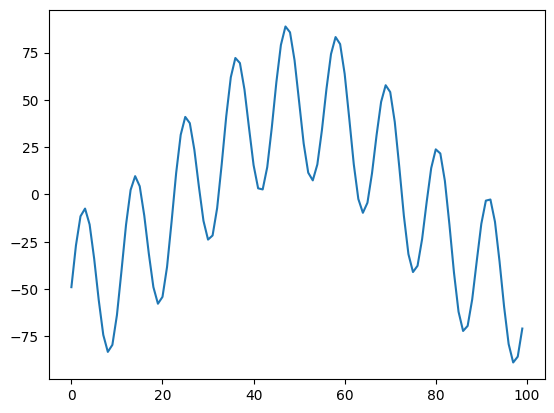

In [5]:
X=DFTD(x)
V=IDFT(X)
plt.plot(V)


Dió perfecto! Veamos ahora la integral, que implica multiplicar por $1/ik$. Le ponemos $1/(ik+epsilon)$ para que no proteste la compu por un cero dividiendo.

In [6]:
def DFTI(x):
  N=len(x)
  X=[]
  for k in range(N):
    X_k=0
    for n in range(N):
      e=np.exp((2j*np.pi*k*n)/N)
      X_k+=x[n]/e
    X.append((X_k)/(1j*(k+0.001)))
  return np.array(X)


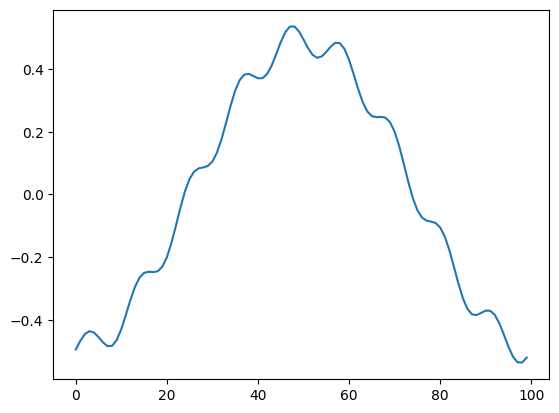

In [7]:
Y=DFTI(x)
W=IDFT(Y)
plt.plot(W)

Da perfecto de nuevo. Esto pasó porque las funciones no pegan saltos en el borde. Son periòdicas. Qué pasa si no? Por ejemplo, utilizar las mismas funciones pero en un intervalo que no es un perìodo, donde ocurre el fenómeno de Gibbs.

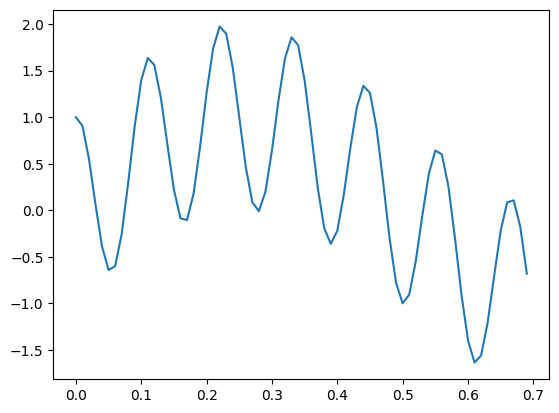

In [8]:
sr=100
ts=1/sr
t=np.arange(0,0.7,ts)
z=np.sin(2*np.pi*t)+np.cos(18*np.pi*t)
plt.plot(t, z)

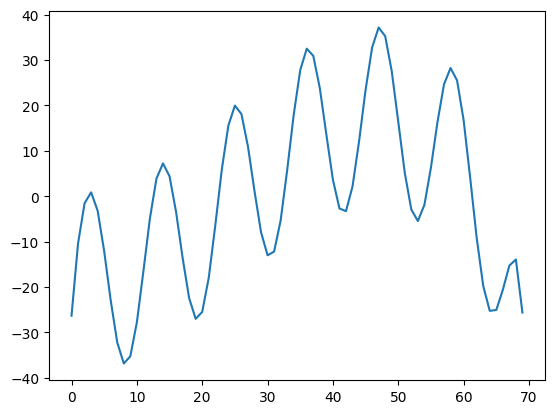

In [9]:
Z=DFTD(z)
v=IDFT(Z)
plt.plot(v)


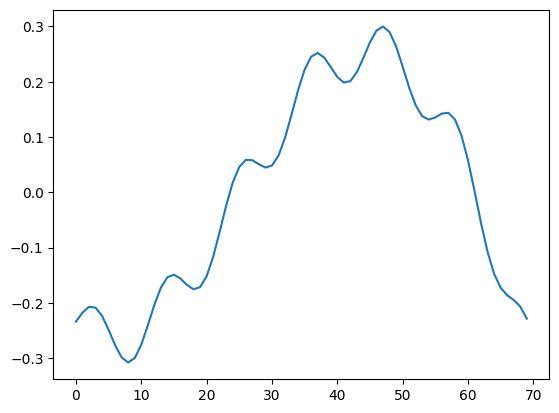

In [10]:
A=DFTI(z)
B=IDFT(A)
plt.plot(B)


Sigue dando bien, pero es porque el salto es pequeño en comparación con los valores de la función. Veamos una exponencial

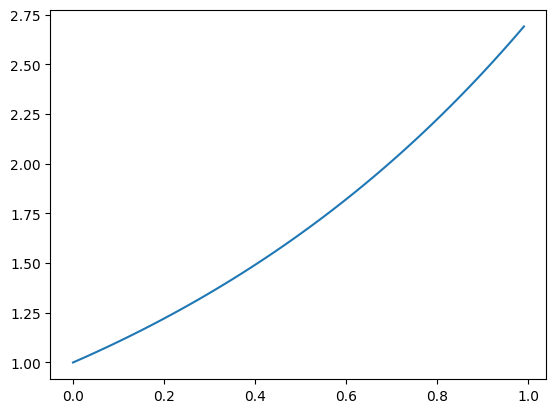

In [14]:
sr=100
ts=1/sr
t=np.arange(0,1,ts)
zu=np.exp(t)
plt.plot(t, zu)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


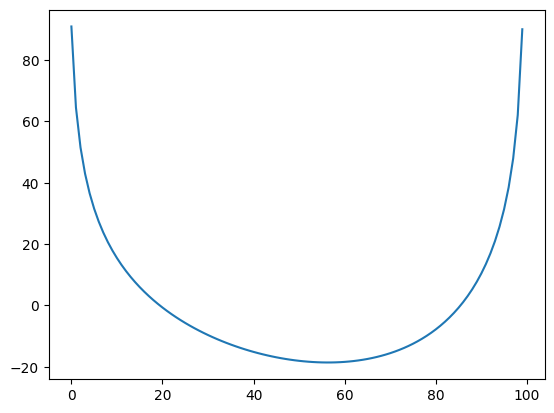

In [15]:
Zu=DFTD(zu)
Vu=IDFT(Zu)
plt.plot(Vu)

Realmente no da bien en cero por el fenòmeno de Gibbs, ni en las puntas en general. Es aquí donde entra el còdigo padding que hizo Nico.